# **Import Libaray**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, f1_score
from sklearn.metrics import classification_report

plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

# **importing Dataset**

In [4]:
data = pd.read_csv('diabetes.csv')

# **Explore Data**

In [5]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [8]:
data.shape

(768, 9)

In [9]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
data.duplicated().sum()

0

# **Analysis**

In [11]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<Axes: >

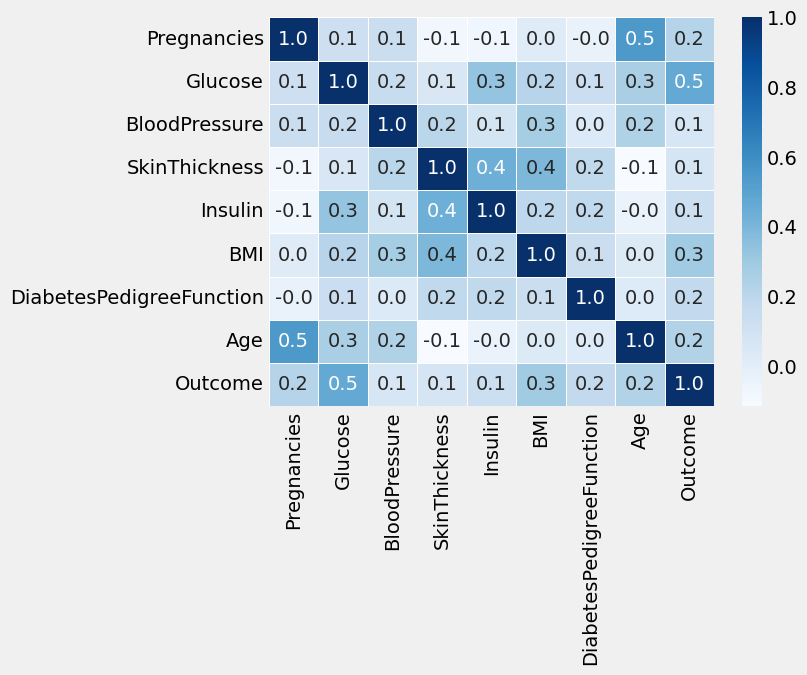

In [12]:
sns.heatmap(data.corr(),annot=True,linewidth=.5,fmt='0.1f',cmap='Blues')

<Axes: xlabel='Outcome', ylabel='count'>

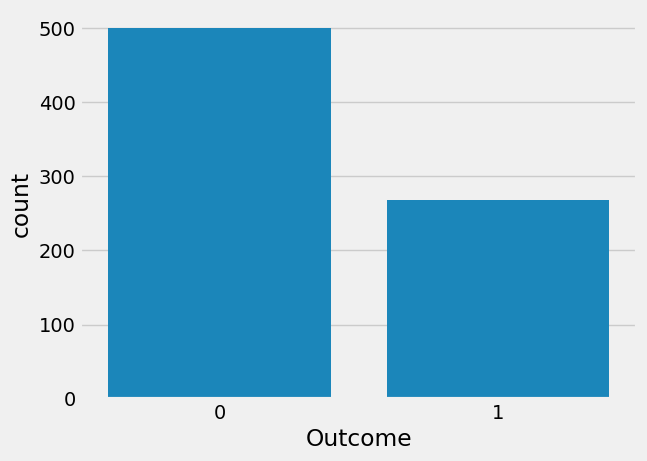

In [13]:
sns.countplot(x='Outcome',data=data)

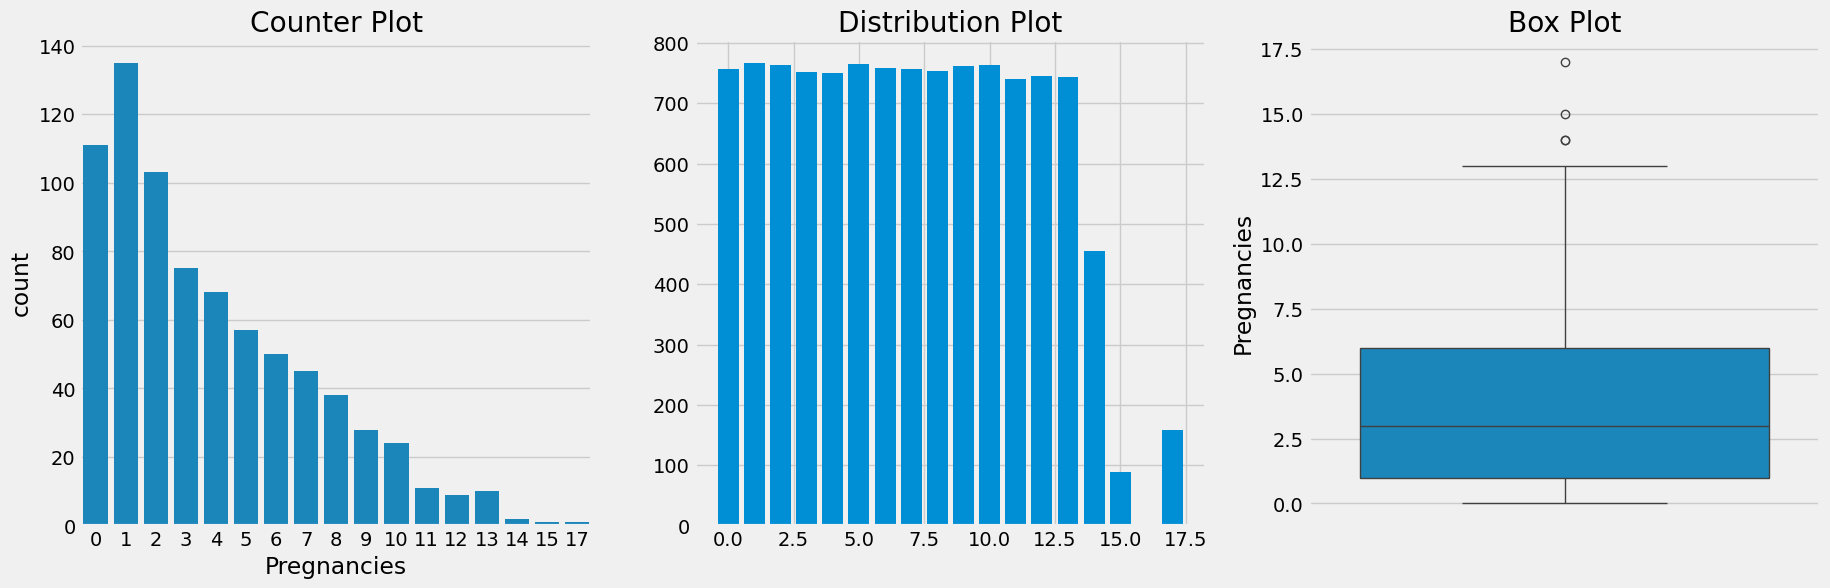

In [14]:
plt.figure(figsize=(20,6))

plt.subplot(1,3, 1)
plt.title('Counter Plot')
sns.countplot(x='Pregnancies',data=data)

plt.subplot(1,3,2)
plt.title('Distribution Plot')
y_values = range(len(data['Pregnancies']))
plt.bar(data['Pregnancies'], y_values)

plt.subplot(1,3,3)
plt.title('Box Plot')
sns.boxplot(y=data['Pregnancies'])

plt.show()

<Axes: ylabel='Age'>

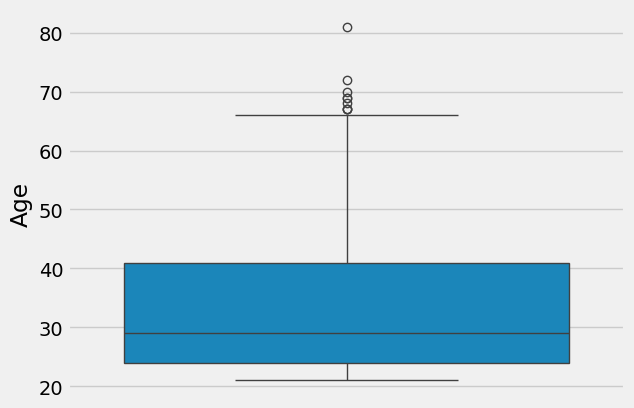

In [15]:
sns.boxplot(data.Age)

# Create Model

In [16]:
x=data.drop('Outcome',axis=1)
y=data['Outcome']

In [17]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

In [18]:
model1=LogisticRegression()
model2=SVC()
model3=RandomForestClassifier()
model4=GradientBoostingClassifier(n_estimators=1000)

In [19]:
columns=['LogisticRegression','SVC','RandomForestClassifier','GradientBoostingClassifier']
result1=[]
result2=[]
result3=[]

Name model : LogisticRegression()
accuracy : 0.7467532467532467
recall : 0.6727272727272727
f1_score : 0.6548672566371682
confusion : [[78 21]
 [18 37]]


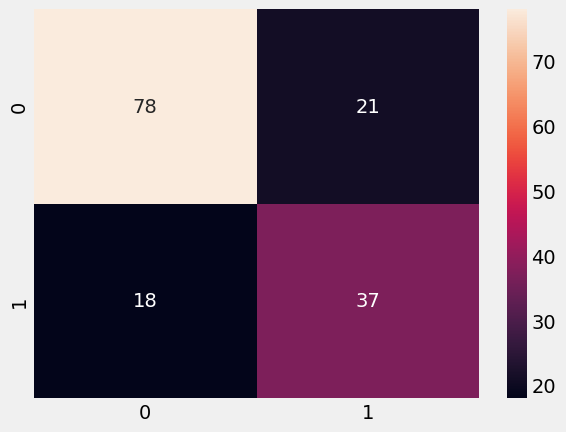

In [20]:
def cal(model1):
    model1.fit(x_train,y_train)
    pre = model1.predict(x_test)
    accuracy=accuracy_score(y_test,pre)
    recall=recall_score(y_test,pre)
    f1=f1_score(y_test,pre)
    confusion=confusion_matrix(y_test,pre)

    result1.append(accuracy)
    result2.append(recall)
    result3.append(f1)

    print(f'Name model : {model1}')
    print(f'accuracy : {accuracy}')
    print(f'recall : {recall}')
    print(f'f1_score : {f1}')
    print(f'confusion : {confusion}')
    sns.heatmap(confusion_matrix(y_test,pre),annot=True)
cal(model1)

Name model : SVC()
accuracy : 0.7662337662337663
recall : 0.5636363636363636
f1_score : 0.6326530612244898
confusion : [[87 12]
 [24 31]]


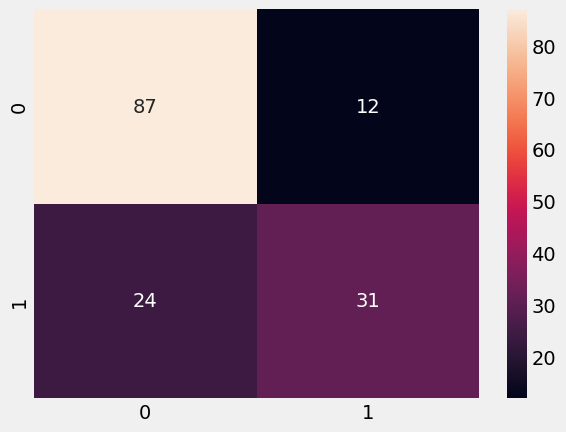

In [21]:
cal(model2)

Name model : RandomForestClassifier()
accuracy : 0.7272727272727273
recall : 0.6181818181818182
f1_score : 0.6181818181818182
confusion : [[78 21]
 [21 34]]


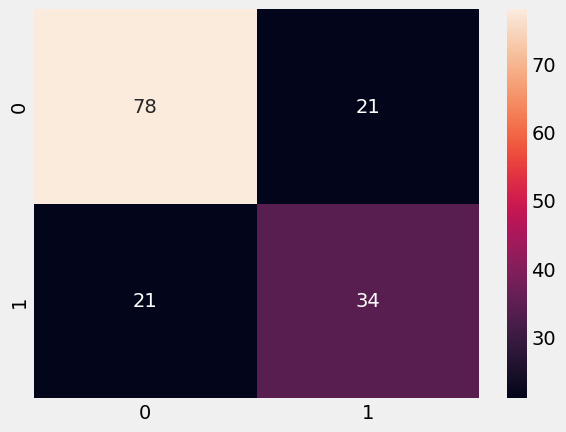

In [22]:
cal(model3)

Name model : GradientBoostingClassifier(n_estimators=1000)
accuracy : 0.7337662337662337
recall : 0.7090909090909091
f1_score : 0.6554621848739496
confusion : [[74 25]
 [16 39]]


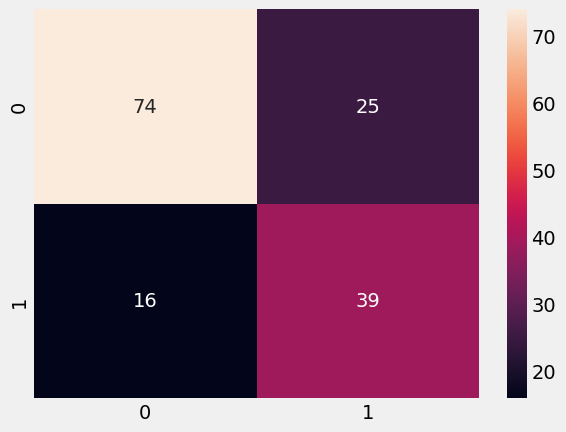

In [23]:
cal(model4)

In [24]:
result1

[0.7467532467532467,
 0.7662337662337663,
 0.7272727272727273,
 0.7337662337662337]

In [25]:
result2

[0.6727272727272727,
 0.5636363636363636,
 0.6181818181818182,
 0.7090909090909091]

In [26]:
result3

[0.6548672566371682,
 0.6326530612244898,
 0.6181818181818182,
 0.6554621848739496]

In [27]:
final_result=pd.DataFrame({'Algorithm':columns,'Accuracies': result1,'recall':result2,'F1_score':result3})
final_result

,Algorithm,Accuracies,recall,F1_score
0,LogisticRegression,0.746753,0.672727,0.654867
1,SVC,0.766234,0.563636,0.632653
2,RandomForestClassifier,0.727273,0.618182,0.618182
3,GradientBoostingClassifier,0.733766,0.709091,0.655462


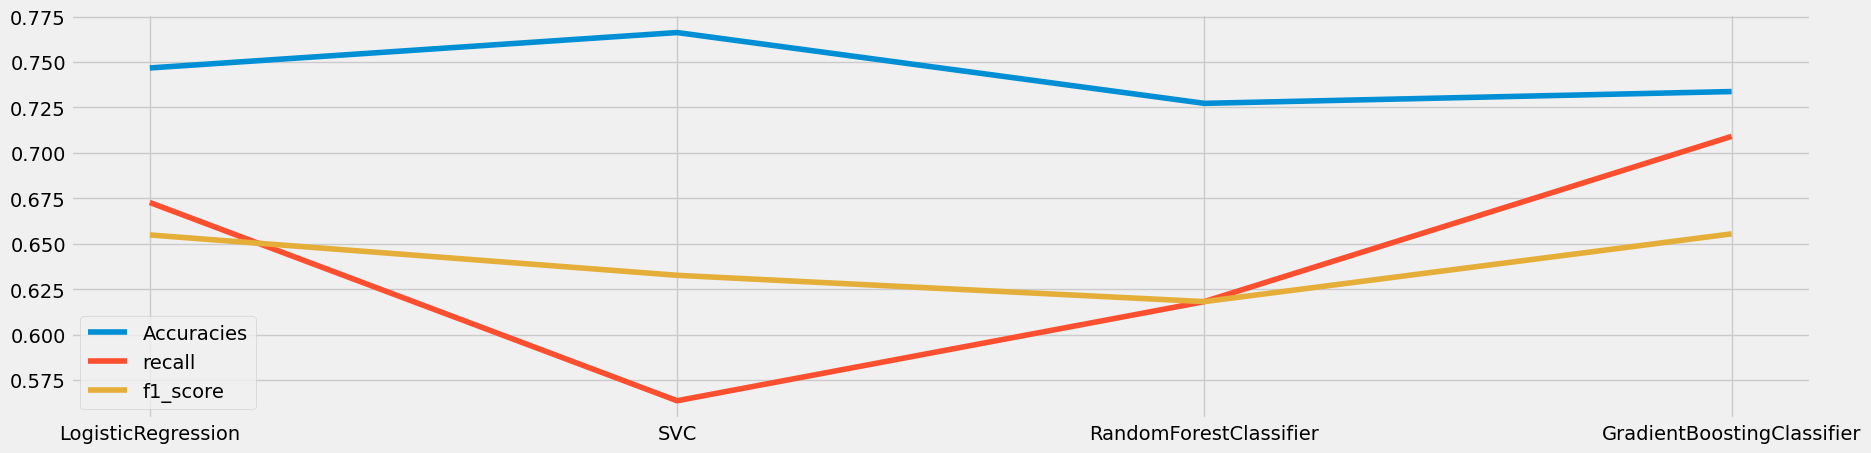

In [28]:
fig,ax=plt.subplots(figsize=(20,5))
plt.plot(final_result.Algorithm,result1,label='Accuracies')
plt.plot(final_result.Algorithm,result2,label='recall')
plt.plot(final_result.Algorithm,result3,label='f1_score')
plt.legend()
plt.show()

Explore D